In [468]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [469]:
images_path = "TP3\images"
template_path = "TP3\\template"


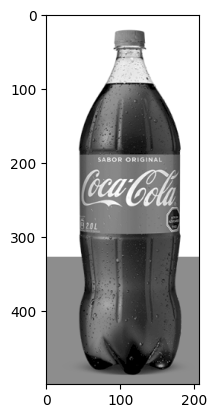

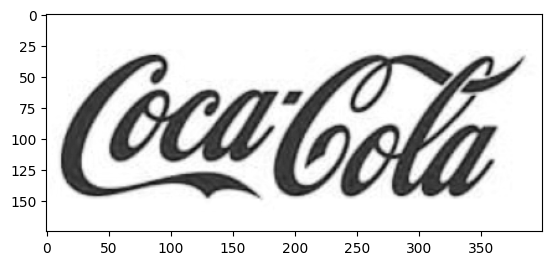

In [470]:
# Grafico el template y 1 imagen
path_img = images_path + '\coca_logo_1.png'
path_template = template_path + '\pattern.png'

img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

template = cv.imread(path_template, cv.IMREAD_GRAYSCALE)
#template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img, cmap = 'gray')
plt.show()


plt.figure()
plt.imshow(template, cmap = 'gray')
plt.show()

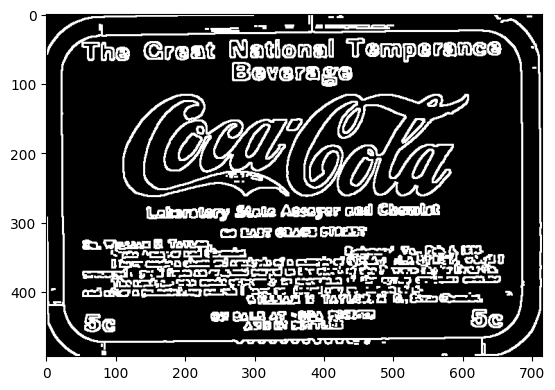

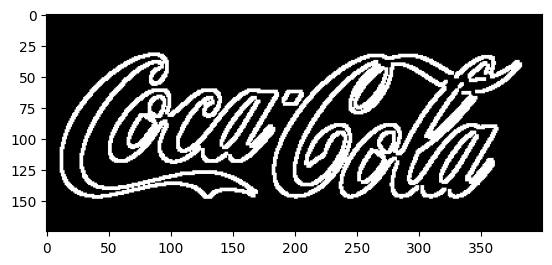

In [471]:
#Filtering
path_img = images_path + '\coca_retro_1.png'
path_template = template_path + '\pattern.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)
template = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

img_f = cv.GaussianBlur(img, ksize = (3, 3), sigmaX = 1)
template_f = cv.GaussianBlur(template, ksize = (7, 7), sigmaX = 1)

img_f = cv.Canny(img_f, 230,240, L2gradient = True)
template_f = cv.Canny(template_f, 230, 240, L2gradient = True)

kernel = np.ones((3,3),np.uint8)

#img_f = cv.GaussianBlur(img_f, ksize = (7, 7), sigmaX = 2)
#template_f = cv.GaussianBlur(template_f, ksize = (7, 7), sigmaX = 2)

img_f = cv.dilate(img_f,kernel,iterations = 1)
template_f = cv.dilate(template_f,kernel,iterations = 1)

#img_f = cv.GaussianBlur(img_f, ksize = (7, 7), sigmaX = 2)
#template_f = cv.GaussianBlur(template_f, ksize = (7, 7), sigmaX = 2)

#img_f = cv.erode(img_f,kernel,iterations = 1)
#template_f = cv.erode(template_f,kernel,iterations = 1)

#img_f = cv.medianBlur(img_f,ksize = 3)
#template_f = cv.medianBlur(template_f,ksize = 3)

ret, img_f = cv.threshold(img_f, 220, 255, cv.THRESH_BINARY)
ret, template_f = cv.threshold(template_f, 220, 255, cv.THRESH_BINARY)

#img_f = cv.dilate(img_f,kernel,iterations = 1)
#template_f = cv.dilate(template_f,kernel,iterations = 1)

plt.figure()
plt.imshow(img_f, cmap = 'gray')
plt.show()

plt.figure()
plt.imshow(template_f, cmap = 'gray')
plt.show()

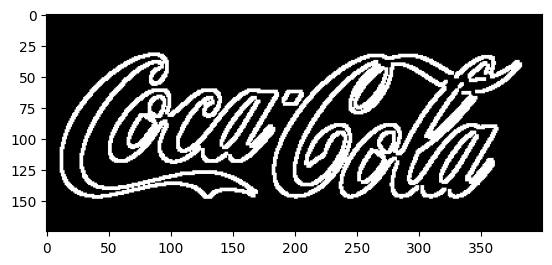

In [472]:
#Reduce excess area of template

height, width = template_f.shape

y_start_offset = 25
x_start_offset = 5
y_end_offset = 10
x_end_offset = 15

y_start_offset = 0
x_start_offset = 0
y_end_offset = 0
x_end_offset = 0

template_fc = np.zeros((height-y_start_offset-y_end_offset,width-x_start_offset-x_end_offset),np.uint8)

template_fc = template_f[y_start_offset:height-y_end_offset, x_start_offset:width-x_end_offset]

plt.figure()
plt.imshow(template_fc, cmap = 'gray')
plt.show()


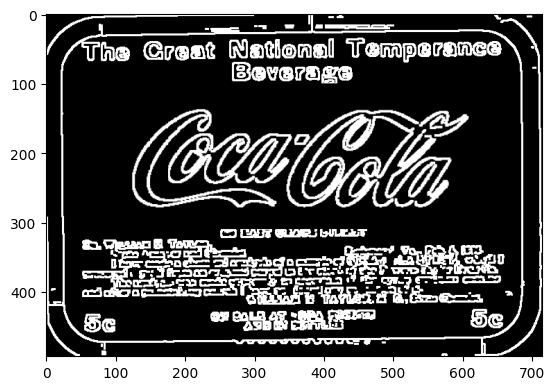

In [473]:
#Pruebo que un resize a mano
height, width = template_fc.shape

dim = (int(width * 1.3), int(height * 1.2))
resized = cv.resize(template_fc, dim, interpolation = cv.INTER_AREA)

copy = np.zeros((height,width),np.uint8)

copy = img_f.copy()

y_offset = 100
x_offset = 110

copy[y_offset:y_offset+resized.shape[0], x_offset:x_offset+resized.shape[1]] = resized

plt.figure()
plt.imshow(copy, cmap = 'gray')
plt.show()



(0, 0)
1.0


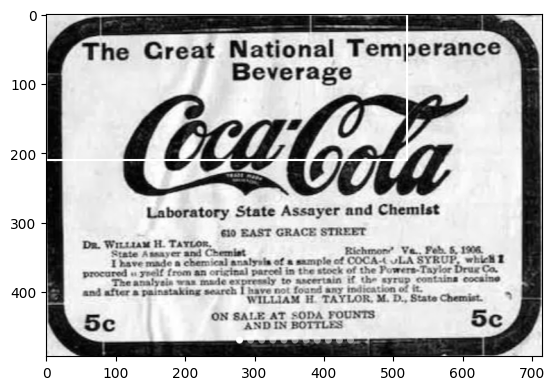

In [474]:
#Pruebo un matching a mano
height, width = template_fc.shape

dim = (int(width * 1.3), int(height * 1.2))
resized = cv.resize(template_fc, dim, interpolation = cv.INTER_AREA)


result = cv.matchTemplate(img_f, resized, cv.TM_SQDIFF_NORMED)
(min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

height, width = resized.shape
top_left = min_loc
bottom_right = (top_left[0] + width, top_left[1] + height)


copy = img.copy()


cv.rectangle(copy,top_left, bottom_right, 255, 2)

print(min_loc)
print(min_val)
plt.figure()
plt.imshow(copy, cmap = 'gray')
plt.show()

In [475]:
np.linspace(1, 3, 20)

array([1.        , 1.10526316, 1.21052632, 1.31578947, 1.42105263,
       1.52631579, 1.63157895, 1.73684211, 1.84210526, 1.94736842,
       2.05263158, 2.15789474, 2.26315789, 2.36842105, 2.47368421,
       2.57894737, 2.68421053, 2.78947368, 2.89473684, 3.        ])

(0.35792121291160583, (104, 82), 1.2857142857142856, 1.1428571428571428)


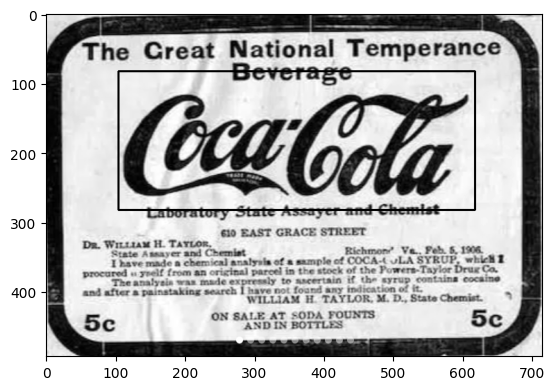

In [476]:
#Matching con escala variable
height, width = template_fc.shape
found = None

for scale_x in np.linspace(1, 3, 15):
  for scale_y in np.linspace(1, 3, 15):
    dim = (int(width * scale_x), int(height * scale_y))
    resized = cv.resize(template_fc, dim, interpolation = cv.INTER_AREA)

    if resized.shape[0] > img_f.shape[0] or resized.shape[1] > img_f.shape[1]:
      break

    result = cv.matchTemplate(img_f, resized, cv.TM_CCORR_NORMED)
    (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

    if found is None or max_val > found[0]:
      found = (max_val, max_loc, scale_x, scale_y)


top_left = found[1]
bottom_right = (top_left[0] + int(width * found[2]), top_left[1] + int(height * found[3]))

copy = img.copy()

cv.rectangle(copy,top_left, bottom_right, 0, 2)

print(found)
plt.figure()
plt.imshow(copy, cmap = 'gray')
plt.show()  


In [615]:
#Funcion para matchear 1 imagen
def match_1_coke_logo(input_image:np.ndarray, starting_scale):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (3, 3), sigmaX = 1)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 200,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((9,9),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.GaussianBlur(image_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.erode(image_filtered,kernel,iterations = 3)  

    #ret, image_filtered = cv.threshold(image_filtered, 220, 255, cv.THRESH_BINARY)
    #ret, template_filtered = cv.threshold(template_filtered, 1, 255, cv.THRESH_BINARY)   

    #Hago el matching con escala variable
    height, width = template_filtered.shape
    found = None
    for scale_x in np.linspace(starting_scale, 1.5, 30):
        for scale_y in np.linspace(starting_scale, 1.5, 30):
            dim = (int(width * scale_x), int(height * scale_y))
            resized = cv.resize(template_filtered, dim, interpolation = cv.INTER_AREA)

            if resized.shape[0] > image_filtered.shape[0] or resized.shape[1] > image_filtered.shape[1]:
                #print("Template larger than image")
                break

            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                break            

            result = cv.matchTemplate(image_filtered, resized, cv.TM_SQDIFF_NORMED)
            (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

            if found is None or min_val < found[0]:
                found = (min_val, min_loc, scale_x, scale_y)
                copy1 = resized.copy()
                copy2 = image_filtered.copy()

    top_left = found[1]
    bottom_right = (top_left[0] + int(width * found[2]), top_left[1] + int(height * found[3]))

    copy = input_image.copy()

    cv.rectangle(copy,top_left, bottom_right, 0, 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  

    plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()

(0.5568557381629944, (103, 78), 1.293103448275862, 1.2241379310344827)


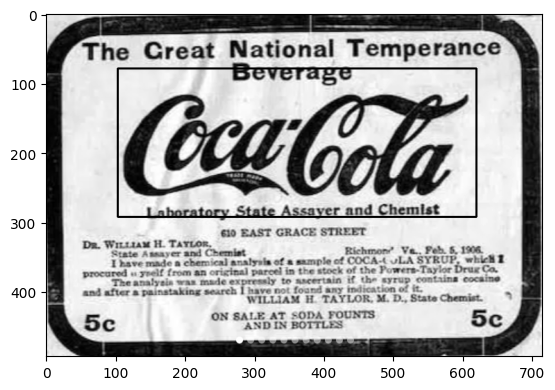

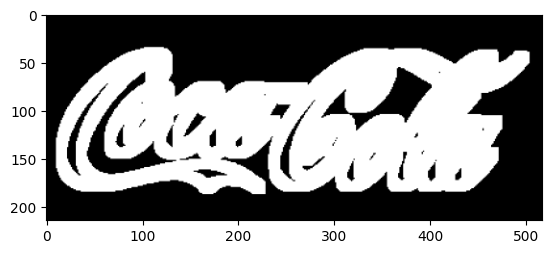

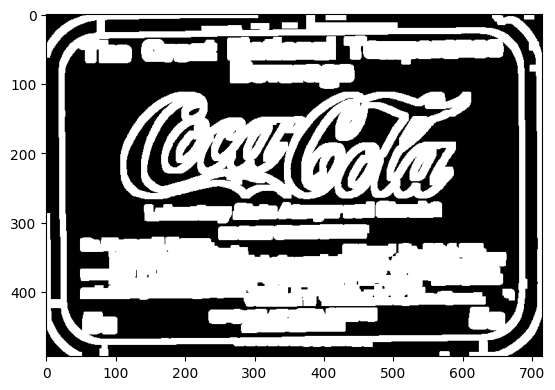

In [616]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_retro_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 1)


(0.23142729699611664, (62, 180), 0.38275862068965516, 0.4241379310344827)


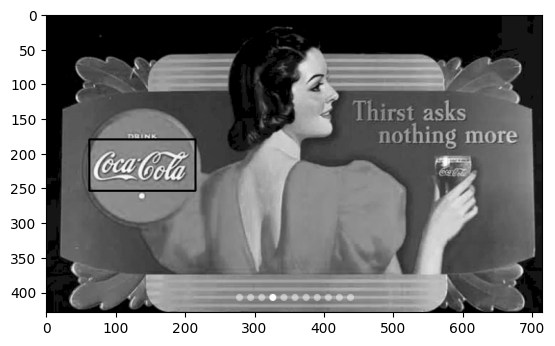

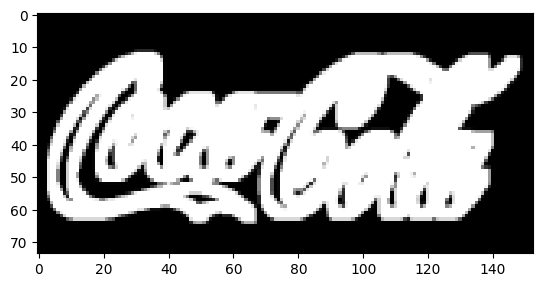

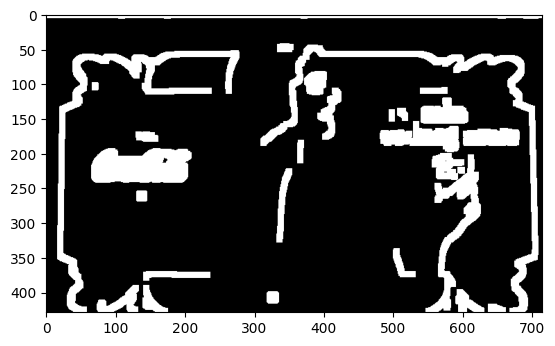

In [617]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_retro_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.3)

(0.3771648705005646, (37, 194), 0.38275862068965516, 0.46551724137931033)


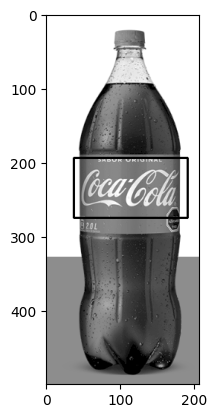

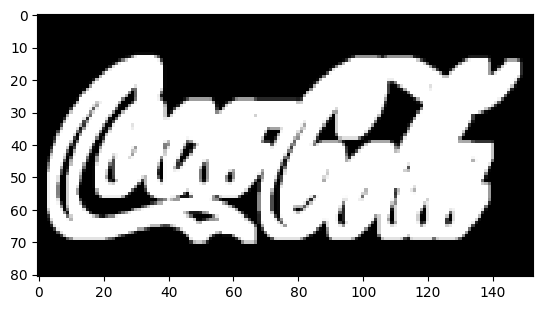

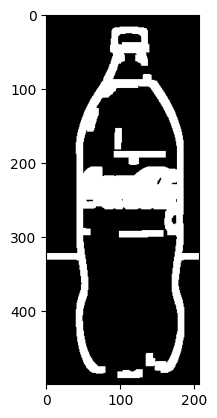

In [620]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.3)

(0.3333207666873932, (0, 102), 0.5689655172413793, 0.7068965517241379)


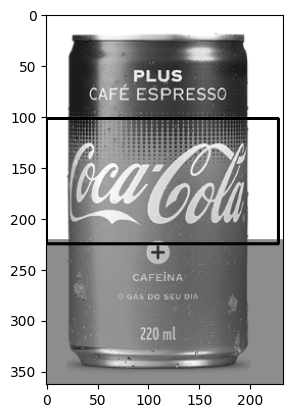

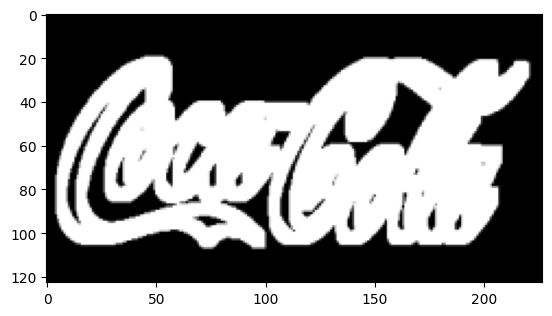

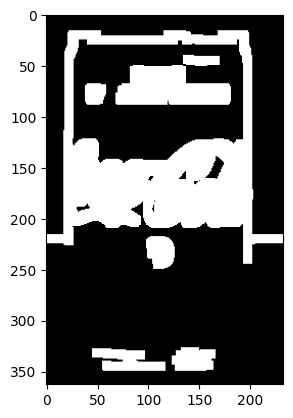

In [622]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.5)

(0.38659220933914185, (206, 191), 0.6379310344827587, 0.7413793103448276)


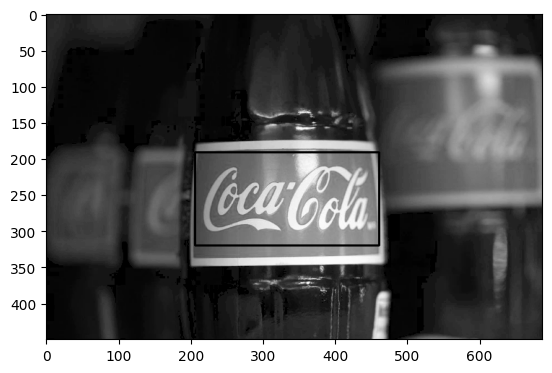

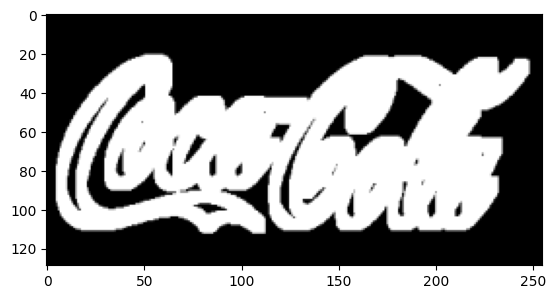

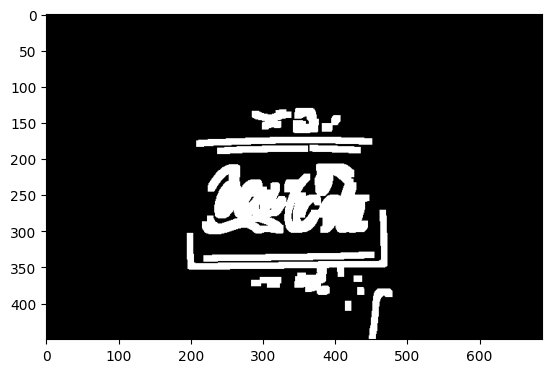

In [624]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.5)

Al intentar generalizar, se ve como la escala de ajuste del template termina afectando mucho el desempeño del algoritmo.
Si se comienza con una escala muy pequeña en una imagen, el algoritmo encuentra incorrectamente el logo en la imagen.

PARTE 2

(0.4283876419067383, (105, 144), 0.24482758620689657, 0.2896551724137931)


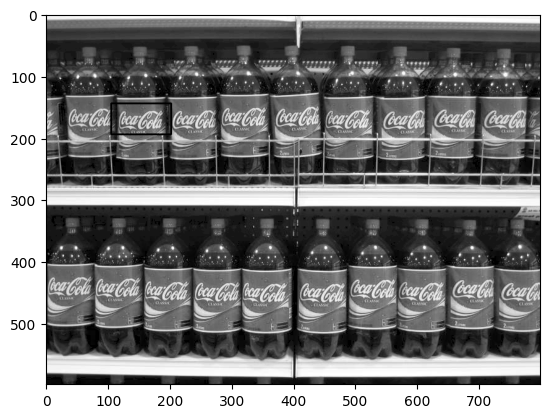

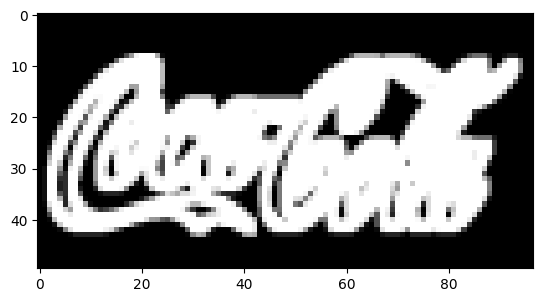

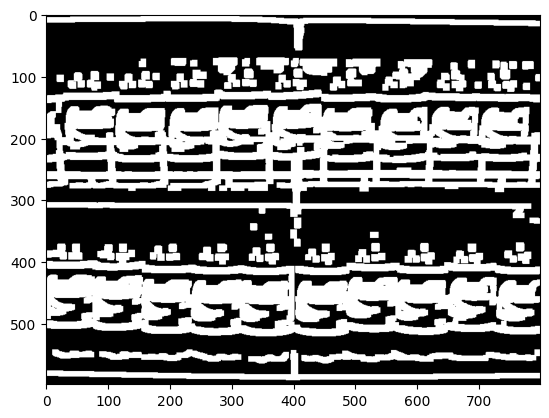

In [625]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_multi.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.2)

In [652]:
#Funcion para matchear 1 imagen
def match_multiple_coke_logo(input_image:np.ndarray, starting_scale, threshold):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (3, 3), sigmaX = 1)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 200,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((5,5),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #Hago el matching con escala variable
    height, width = template_filtered.shape
    found = None
    loc = None
    for scale_x in np.linspace(starting_scale, 1.5, 30):
        for scale_y in np.linspace(starting_scale, 1.5, 30):
            dim = (int(width * scale_x), int(height * scale_y))
            resized = cv.resize(template_filtered, dim, interpolation = cv.INTER_AREA)

            if resized.shape[0] > image_filtered.shape[0] or resized.shape[1] > image_filtered.shape[1]:
                #print("Template larger than image")
                break

            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                break            

            result = cv.matchTemplate(image_filtered, resized, cv.TM_CCOEFF_NORMED)
            (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

            if found is None or max_val > found[0]:
                loc = np.where( result >= threshold)
                found = (max_val, max_loc, scale_x, scale_y)
                copy1 = resized.copy()
                copy2 = image_filtered.copy()

    copy = input_image.copy()

    for pt in zip(*loc[::-1]):
        cv.rectangle(copy, pt, (pt[0] + int(width * scale_x), pt[1] + int(height * scale_y)), (0,0,255), 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  

    plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()

(0.5592507123947144, (103, 145), 0.24482758620689657, 0.2896551724137931)


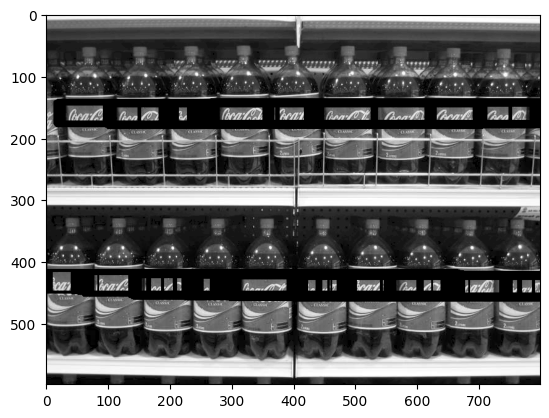

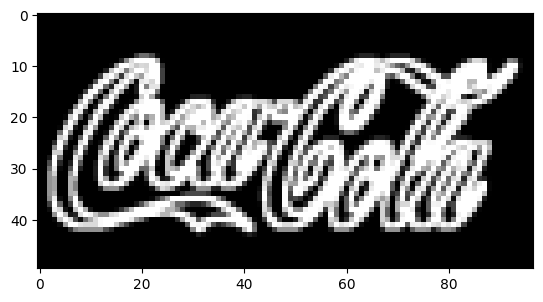

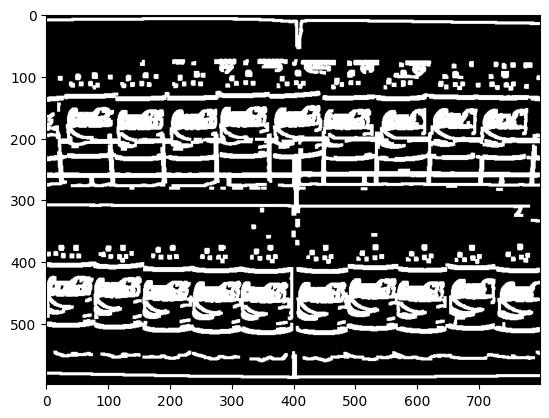

In [654]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_multi.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.2, 0.35)

PARTE 3

(0.580099880695343, (35, 197), 0.3896551724137931, 0.4293103448275862)


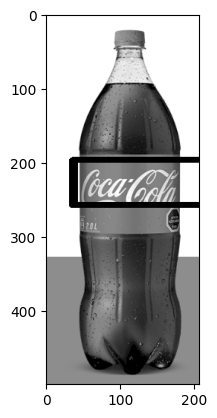

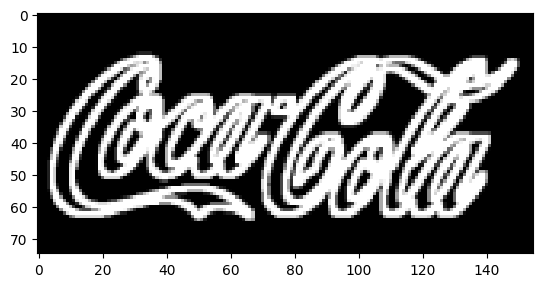

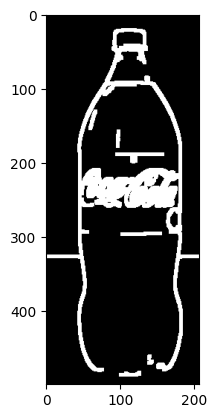

In [663]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.35, 0.5)

(0.5436610579490662, (0, 103), 0.5689655172413793, 0.7068965517241379)


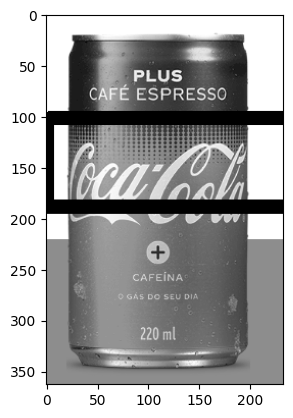

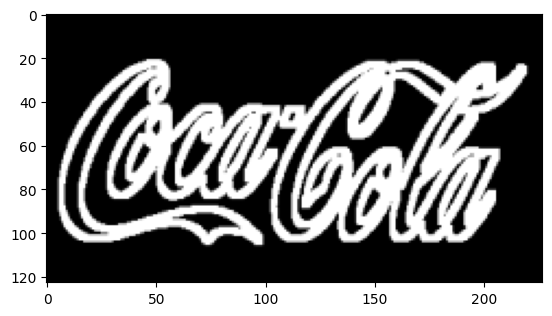

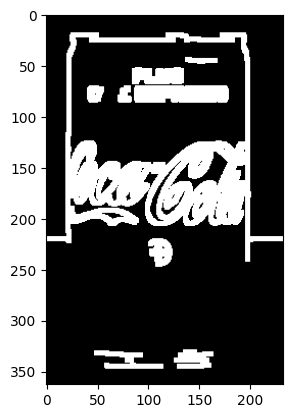

In [666]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.5, 0.4)